In [2]:
import sys
!pip install opencv-python

In [3]:
import numpy as np                     #main package for scientific computing with Python.
from matplotlib import image           #plot graphs in Python.
import matplotlib.pyplot as plt        #lazy plotting
import cv2                             #image opening
import os                              #operation system


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jensu\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\jensu\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\jensu\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\jensu\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: initialization failed

# Data Loading
Now, we load the data that we will need for the NN

In [ ]:
#We create two empty lists to store the data (the images) and the labels (0 if bird, 1 if dog)
data=[]
labels=[]
image_size=32
#We now load the data into the notebook from the folder on your computer
for filename in os.listdir('Data/train/bird/'):
    labels.append(0)
    data.append(cv2.resize(image.imread('Data/train/bird/'+filename),dsize=(image_size,image_size)))
for filename in os.listdir('Data/train/dog/'):
    labels.append(1)
    data.append(cv2.resize(image.imread('Data/train/dog/'+filename),dsize=(image_size,image_size)))
data=np.array(data)
labels=np.array(labels)

Questions:
How many data do we have in total?

In [6]:
np.random.seed(0)
idx=np.random.permutation(len(labels))
idx_train=idx[0:2000]
idx_test=idx[2001:2401]
train_x=data[idx_train]
test_x=data[idx_test]
train_y=labels[idx_train].reshape(1,-1)
test_y=labels[idx_test].reshape(1,-1)

What is the size of the images?
Does the size matter?

In [8]:
# we use a single dimension layer, so flattening the matrix
train_x_flatten=train_x.reshape(train_x.shape[0],-1).T
test_x_flatten=test_x.reshape(test_x.shape[0],-1).T
# all values must be "normalized" meaning between 0 and 1
train_x_flatten=train_x_flatten/255
test_x_flatten=test_x_flatten/255

## 2. Pytorch

We now see how to build a NN with library designed for this purpose. One of the great advantage of these libraries is that we don't need to perform the gradient descent ourselves. The library is also optimized to run faster than what we did with numPy. It is thus possible to train larger NN, that should provide better accuracy.

In [ ]:
import sys
!{sys.executable} -m pip install torch

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3072, 1024)
        self.dropout1=nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 256)
        self.dropout2=nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 64)
        self.dropout3=nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 2)

    # x represents our data
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout3(x)
        x = self.fc4(x)      
        return x

In [22]:
my_nn=Net()

In [23]:
criterion=nn.CrossEntropyLoss()
optimizer = optim.SGD(my_nn.parameters(), lr=0.001, momentum=0.9)

In [24]:
train=[]
test=[]
for i in range(len(idx_train)):
    train.append(np.append(train_x_flatten[:,i],train_y[:,i]))
for i in range(len(idx_test)):
    test.append(np.append(test_x_flatten[:,i],test_y[:,i]))
train=np.array(train)
test=np.array(test)

In [25]:
class data(Dataset):
    def __init__(self, data):
        self.data = torch.FloatTensor(data)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        target = self.data[index][-1]
        data_val = self.data[index] [:-1]
        return data_val,target
train_dataset = data(train)
test_dataset = data(test)
trainloader = DataLoader(train_dataset, batch_size=20,shuffle=True)
testloader = DataLoader(test_dataset, batch_size=399,shuffle=False)

epoch 1 training loss: 0.695
Accuracy of the network on the 400 test images: 47 %
epoch 2 training loss: 0.693
Accuracy of the network on the 400 test images: 56 %
epoch 3 training loss: 0.691
Accuracy of the network on the 400 test images: 46 %
epoch 4 training loss: 0.692
Accuracy of the network on the 400 test images: 48 %
epoch 5 training loss: 0.690
Accuracy of the network on the 400 test images: 48 %
epoch 6 training loss: 0.690
Accuracy of the network on the 400 test images: 49 %
epoch 7 training loss: 0.688
Accuracy of the network on the 400 test images: 54 %
epoch 8 training loss: 0.687
Accuracy of the network on the 400 test images: 55 %
epoch 9 training loss: 0.685
Accuracy of the network on the 400 test images: 59 %
epoch 10 training loss: 0.684
Accuracy of the network on the 400 test images: 57 %
epoch 11 training loss: 0.679
Accuracy of the network on the 400 test images: 60 %
epoch 12 training loss: 0.679
Accuracy of the network on the 400 test images: 59 %
epoch 13 trai

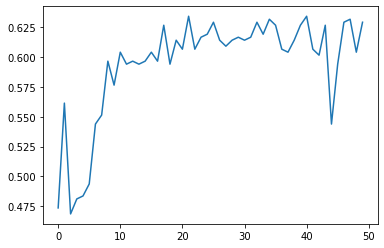

In [26]:
if 1:# unlock to run
    accuracy=[]
    epochs=50
    for epoch in range(epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            my_nn.train()
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = my_nn(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            #if i % 100 == 0:    # print every 2000 mini-batches
        print('epoch %d training loss: %.3f' %
                (epoch + 1, running_loss / 100))
        running_loss = 0.0

        correct = 0
        total = 0
        my_nn.eval()
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = my_nn(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the 400 test images: %d %%' % (
            100 * correct / total))
        accuracy.append(correct / total)
    print('Finished Training')
    plt.plot(range(epochs),accuracy)

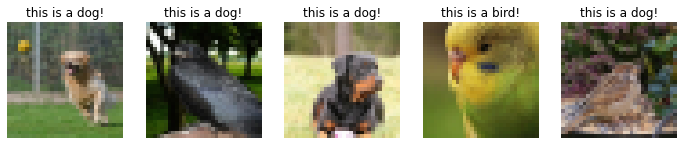

In [27]:
try:
    testloader = DataLoader(test_dataset, batch_size=10,shuffle=False)
    switch=True
except:
    print('Torch did not complete')
    switch=False
if switch:
    for i,data in enumerate(testloader):
        images,label=data
        out=my_nn(images)
        torch.max(out.data, 1)
        ident=torch.max(out.data, 1).indices
        if i==6:break
    ident=ident.tolist()
    fig,ax=plt.subplots(1,5,figsize=(12,3))
    for i in range(5):
        if ident[i] == 0:
            stringen='this is a bird!'
        else:
            stringen='this is a dog!'
        ax[i].imshow(images[i].reshape(32,32,3))
        ax[i].set_title(stringen)
        ax[i].axis('off')

We still see a similar overfitting, Can you recognize the same features of the forward method in the class description?
Still this type of NN is however not optimal for image analysis. Much better is to use a few extra layers that compact the image and use a forward only network. Lets use Keras for this implementation